In [130]:
import pandas as pd
df = pd.read_csv(r'C:\Users\zzg\Desktop\data.csv', sep = ',')

In [131]:
from sklearn import datasets
import numpy as np
y = df.iloc[:, 11]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Unnamed: 11, dtype: int64

In [159]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
X.head()

,red team 1,red team 2,red team 3,red team 4,red team 5,blue team 1,blue team 2,blue team 3,blue team 4,blue team 5
0,96,69,21,5,119,74,34,80,31,63
1,97,120,22,101,125,64,107,72,10,96
2,21,84,127,112,86,80,111,64,69,122
3,8,31,96,48,60,3,138,130,73,30
4,124,32,107,64,137,54,96,10,82,114


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y)

In [166]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, random_state=42)
lr.fit(X_train, y_train)



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
# prediction 
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.65


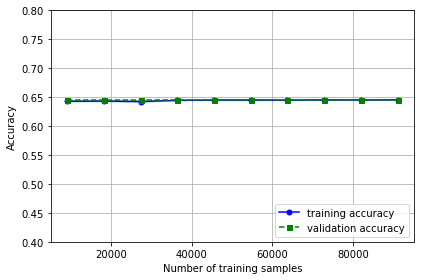

In [168]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 0.8])
plt.tight_layout()
plt.show()

In [169]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=7,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.64552935  0.64550484  0.64550484  0.64550484  0.64550484  0.64554948
  0.64554948]
CV accuracy: 0.646 +/- 0.000


In [170]:
d

array([[ 0.67321064,  0.32678936]])

In [171]:
d = lr.predict(X)

In [172]:
data = pd.DataFrame(d)

In [173]:
data.to_csv('ddd.csv')

In [174]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.36
